In [1]:
# Importing pandas
import pandas as pd

# importing requests
import requests

# importing numpy as np
import numpy as np

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.DataFrame(requests.get("https://api.coinmarketcap.com/v1/ticker/").json())

# Printing out the first few lines
# ... YOUR CODE FOR TASK 1 ...
current.shape

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(100, 15)

In [4]:
#Json file with ALL cryptocurrencies
import pandas as pd

crypto_all = pd.read_json('https://api.coinmarketcap.com/v1/ticker/?limit=0')
crypto_all.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,4.309612e+09,1.723809e+07,bitcoin,1.535552e+09,1.224127e+11,2.100000e+07,Bitcoin,-0.03,0.56,7.54,1.000000,7101.292665,1,BTC,1.723809e+07
1,1.500875e+09,1.016272e+08,ethereum,1.535552e+09,3.006877e+10,NaN,Ethereum,0.02,2.21,4.82,0.041647,295.873230,2,ETH,1.016272e+08
2,3.129757e+08,3.961821e+10,ripple,1.535552e+09,1.393685e+10,1.000000e+11,XRP,0.14,0.86,4.90,0.000050,0.351779,3,XRP,9.999186e+10
3,3.816989e+08,1.731936e+07,bitcoin-cash,1.535552e+09,9.810359e+09,2.100000e+07,Bitcoin Cash,0.29,2.26,4.77,0.079732,566.438826,4,BCH,1.731936e+07
4,8.425879e+08,9.062451e+08,eos,1.535552e+09,5.770371e+09,NaN,EOS,0.19,17.03,28.48,0.000896,6.367340,5,EOS,1.006245e+09


In [5]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = crypto_all[['id', 'market_cap_usd']]

# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...
market_cap_raw.count()

id                1901
market_cap_usd    1486
dtype: int64

In [6]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...
cap.count()

id                1486
market_cap_usd    1486
dtype: int64

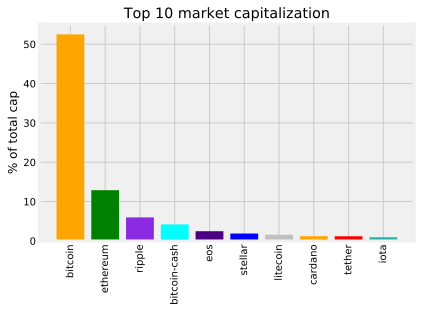

In [18]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10)
cap10 = cap10.set_index('id')

# Calculating market_cap_perc
cap10['market_cap_perc'] = cap10['market_cap_usd'] / sum(cap['market_cap_usd']) * 100

index = np.arange(10)
market_cap_perc = list(cap10.market_cap_perc)
label = list(cap10.index)


# Plotting the barplot with the title defined above 
# Colors for the bar plot
# https://www.webucator.com/blog/2015/03/python-color-constants-module/

COLORS = ['orange', 'green', 'blueviolet', 'cyan', 'indigo', 'blue', 'silver', 'orange', 'red', 'lightseagreen']
ax = plt.bar(index, market_cap_perc, color = COLORS)

# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
plt.xticks(index, label, rotation=90)
plt.ylabel(TOP_CAP_YLABEL)
plt.title(TOP_CAP_TITLE)
plt.show()

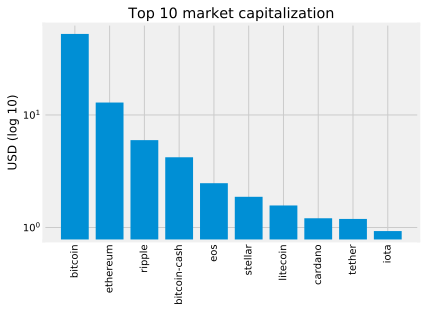

In [19]:
# Colors for the bar plot
#COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = plt.bar(index, market_cap_perc, log = True)

# Annotating the y axis with 'USD'
# ... YOUR CODE FOR TASK 5 ...
plt.ylabel('USD (log 10)')

# Final touch! Removing the xlabel as it is not very informative
# ... YOUR CODE FOR TASK 5 ...
plt.xticks(index, label, rotation=90)
plt.title(TOP_CAP_TITLE)
plt.show()

In [26]:
# Selecting the id, percent_change_24h and percent_change_7d columns# Selec 
volatility = crypto_all[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
volatility.head(10)

,percent_change_24h,percent_change_7d
id,,
newton-coin-project,-65.97,-5.57
cryptoping,-50.97,-43.44
life,-45.58,-33.20
president-johnson,-44.75,18.56
powercoin,-44.27,-39.08
jiyo,-43.88,-42.23
bankcoin,-43.02,-45.65
first-bitcoin-capital,-41.89,42.80
anarchistsprime,-41.30,6.15


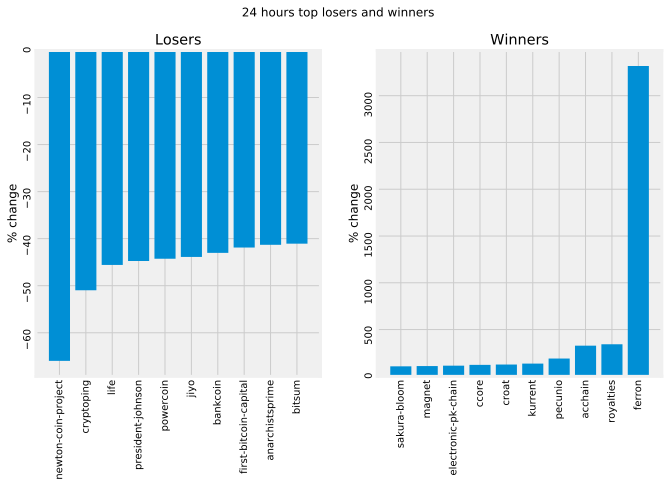

In [21]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = axes[0].bar(volatility.index[:10], volatility[volatility_series].head(10))
    axes[0].tick_params(rotation = 90)
    axes[0].set_title('Losers')
   
    
    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    axes[0].set_ylabel('% change')
    axes[1].set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = axes[1].bar(volatility.index[-10:], volatility[volatility_series].tail(10))
    axes[1].tick_params(rotation = 90)
    axes[1].set_title('Winners')
   
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot('percent_change_24h', DTITLE)

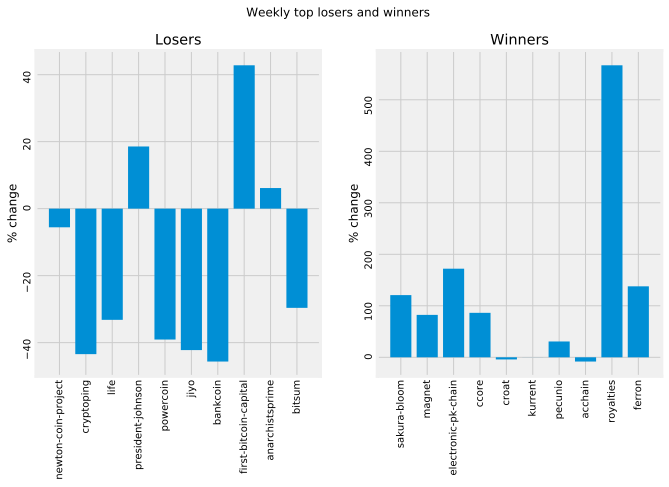

In [22]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot('percent_change_7d', WTITLE)

In [23]:
# Selecting everything bigger than 10 billion # Select 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps

,id,market_cap_usd
0,bitcoin,1.224127e+11
1,ethereum,3.006877e+10
2,ripple,1.393685e+10


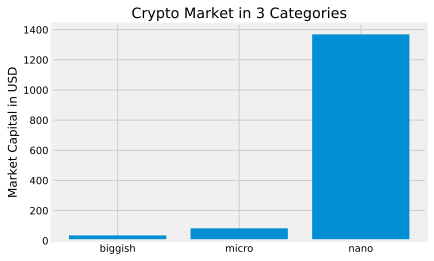

In [24]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd >= 300000000')

# Same as above for micro ...

micro = capcount('market_cap_usd < 300000000 & market_cap_usd >= 50000000')

# ... and for nano
nano =  capcount('market_cap_usd <= 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
# plt.bar(LABELS, values)

plt.bar(LABELS, values)
plt.title('Crypto Market in 3 Categories')
plt.ylabel('Market Capital in USD')
plt.show()